<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Reddit Relationship Advisor

</div>


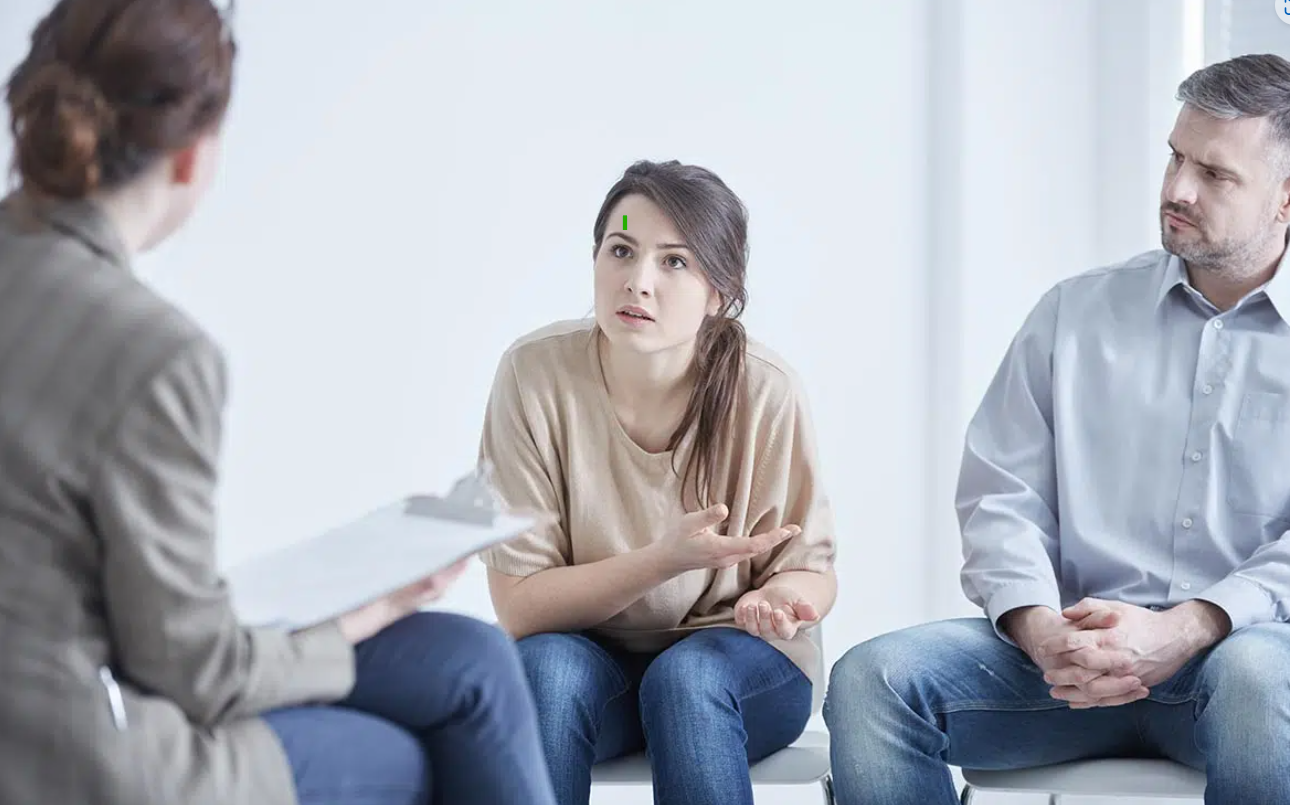

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">💡 Project Overview: Reddit Relationship Advisor</h1>
  <p>Our project aims to offer personalized relationship advice using cutting-edge AI technology. Here’s how it works:</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">🔍 Data Collection:</h2>
  <p>We will gather questions and discussions from various Reddit subreddits dedicated to relationships, ensuring we capture a broad spectrum of real-life relationship issues.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">🤖 Analysis with GPT-2:</h2>
  <p>Using GPT-2, an advanced language model developed by OpenAI and part of the Generative Pre-trained Transformer (GPT) family, we will analyze the collected data. GPT-2 is renowned for its ability to generate coherent and contextually relevant responses based on the input it receives.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">💬 Personalized Advice:</h2>
  <p>Users can submit their own relationship questions, and GPT-2 will generate thoughtful and customized responses designed to address their concerns effectively.</p>
  <p>Our goal is to leverage AI to provide insightful and valuable relationship advice, enhancing users' understanding and approach to their personal relationships.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Subreddit list selection

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">📋 Selecting Relevant Subreddits:</h2>
  <p>Choosing the right subreddits is crucial for ensuring the quality and relevance of the relationship advice we provide. Here’s why we focus on specific subreddits:</p>
  
  <ul>
    <li><strong>Diverse Perspectives:</strong> Different subreddits cater to various aspects of relationships, from dating advice to marriage counseling. By selecting a range of subreddits, we capture diverse perspectives and experiences.</li>
    <li><strong>Community Engagement:</strong> Popular subreddits often have high engagement levels, with active discussions and frequent updates. This ensures that the data we collect is current and reflects the latest trends and issues in relationships.</li>
    <li><strong>Expertise and Credibility:</strong> Some subreddits are known for their expert advice and thoughtful discussions. By including these, we leverage the expertise of experienced community members and professionals.</li>
    <li><strong>Relevance and Specificity:</strong> Selecting subreddits that align closely with our focus areas allows us to gather data that is more relevant to the specific relationship issues we aim to address.</li>
  </ul>
  
  <p>By carefully choosing the subreddits we analyze, we ensure that our AI-driven relationship advice is both insightful and tailored to real-world concerns.</p>

</div>


In [12]:
# Lista subredditów związanych z podróżami vanem
subreddit_list = [
    'LGBT',
    'ExNoContact',
    'EmotionalAbuse',
    'TeenRelationships',
    'relationship_advice',
    'relationships',
    'LongDistance',
    'RelationshipsOver35',
    'BreakUps',
    'Infidelity',
    'Sex',
    'AgeGap',
    'Parenting',
    'datingoverfifty',
     'cheating_stories',
    'love',
    'SwipeHelper',
    'ForeverAlone',
    'CouplesTherapy',
    'Trust',
    'DateNight'
    
]

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Downloading subreddit questions

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">💡 Code Description and Data Processing</h1>
  <p>Our code is designed to fetch data from Reddit, focusing on posts in selected subreddits. Here’s how the code works and some considerations for its use:</p>
  <h2 style="font-size: 20px; font-weight: bold; text-align: left;">🔍 Fetching Posts:</h2>
  <p>The code retrieves posts from a list of subreddits, specifically targeting those where the titles end with a question mark. This ensures we focus on questions, which are more likely to generate valuable responses. Each post is analyzed, and its top comment is saved.</p>
  <h2 style="font-size: 20px; font-weight: bold; text-align: left;">⚙️ Customization and Cleaning:</h2>
  <p>The code may require individual customization and data cleaning to handle cases where bot comments or other unwanted content appear. Bot comments and other inappropriate data should be removed or skipped before further analysis. Cleaning may also involve removing comments that are irrelevant to the context of the question.</p>
  <h2 style="font-size: 20px; font-weight: bold; text-align: left;">📊 Processing Subreddits:</h2>
  <p>Each subreddit is processed separately to allow for thorough monitoring and data collection. This approach ensures that each section of Reddit is analyzed within its own context, which may be necessary for handling a large number of posts or diverse topics within individual subreddits.</p>
  <h2 style="font-size: 20px; font-weight: bold; text-align: left;">📑 Preliminary Data Processing:</h2>
  <p>After fetching the data, it is preliminarily processed to eliminate questions that do not fit the context and comments that may not be valuable for our analysis. This ensures that the final dataset we work with is clean and appropriately prepared.</p>
  <p>Using this code allows for efficient data collection from Reddit, but it is important to tailor it to specific needs and expectations related to content analysis. Careful monitoring and data cleaning will ensure that the information obtained is valuable and useful.</p>
</div>

In [ ]:
import praw
import pandas as pd
import time
from prawcore.exceptions import RequestException, NotFound
import os

# Dane uwierzytelniające do API Reddita (pobierane z zmiennych środowiskowych)
client_id = os.getenv('REDDIT_CLIENT_ID')
client_secret = os.getenv('REDDIT_CLIENT_SECRET')
user_agent = 'MyRedditApp/0.1 by YourRedditUsername'
username = os.getenv('REDDIT_USERNAME')
password = os.getenv('REDDIT_PASSWORD')

# Lista subredditów do monitorowania
subreddit_list = [
    'LGBT', 'ExNoContact', 'EmotionalAbuse', 'TeenRelationships', 'relationship_advice',
    'relationships', 'LongDistance', 'RelationshipsOver35', 'BreakUps', 'Infidelity',
    'Sex', 'AgeGap', 'Parenting', 'datingoverfifty', 'cheating_stories', 'love',
    'SwipeHelper', 'ForeverAlone', 'CouplesTherapy', 'Trust', 'DateNight'
]

# Zmienna do przechowywania danych
data_dict = {
    "subreddit": [],
    "title": [],
    "comment": []
}

limit_posts = 1800  # Oczekiwana liczba postów z każdego subredditu

# Autoryzacja z Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent,
                     username=username,
                     password=password)

# Funkcja do pobierania postów z danego subredditu
def fetch_posts(subreddit_name):
    subreddit = reddit.subreddit(subreddit_name)
    
    total_posts = 0  # Zainicjowanie zmiennej total_posts
    
    try:
        for submission in subreddit.new(limit=None):  # Iterowanie przez wszystkie posty
            # Sprawdź czy tytuł posta kończy się znakiem zapytania
            if submission.title.strip().endswith('?'):
                submission.comment_sort = 'best'
                submission.comment_limit = 1  # Pobierz tylko topowy komentarz
    
                try:
                    submission.comments.replace_more(limit=0)  # Pobierz topowy komentarz
                except RequestException as e:
                    print(f"RequestException occurred: {e}")
                    time.sleep(60)  # Poczekaj minutę przed ponowną próbą
                    continue
                
                top_comment = None
                for comment in submission.comments.list():
                    if isinstance(comment, praw.models.MoreComments):
                        continue
                    top_comment = comment
                    break
                
                if top_comment is not None:
                    data_dict["subreddit"].append(subreddit_name)
                    data_dict["title"].append(submission.title)
                    data_dict["comment"].append(top_comment.body)
                    
                    total_posts += 1
                    print(f"Processed {total_posts} posts in subreddit '{subreddit_name}'")
                
                if total_posts >= limit_posts:
                    return True  # Zwróć True, gdy osiągnięto limit postów
            
                time.sleep(2)  # Dodaj niewielkie opóźnienie między iteracjami, aby zmniejszyć obciążenie
    
    except NotFound:
        print(f"Subreddit '{subreddit_name}' not found or is private.")
        return False  # Zwróć False, jeśli subreddit nie istnieje lub jest prywatny

    return False  # Zwróć False, jeśli subreddit został przeiterowany bez osiągnięcia limitu

# Iteracja przez listę subredditów
for subreddit_name in subreddit_list:
    print(f"Fetching posts from subreddit: {subreddit_name}")
    if fetch_posts(subreddit_name):
        break  # Przerwij iterację, jeśli osiągnięto limit postów

# Tworzenie DataFrame i zapisywanie do pliku CSV
df = pd.DataFrame(data_dict)
df.to_csv('reddit_posts.csv', columns=['subreddit', 'title', 'comment'], index=False)
print(f'Dane zostały zapisane do pliku reddit_posts.csv')

# Wyświetlanie wyników
print(df[['subreddit', 'title', 'comment']])


In [140]:
import pandas as pd
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader, Dataset

# Importowanie niezbędnych zasobów NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Funkcja do oczyszczania tekstu z lematyzacją
def clean_text_with_lemmatization(text):
    text = re.sub(r'[^\w\s]', '', text)  # Usunięcie znaków interpunkcyjnych i specjalnych oraz numerów
    text = text.lower()  # Normalizacja do małych liter
    tokens = word_tokenize(text)  # Tokenizacja tekstu
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Ustawienie stopwords
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematizacja i usunięcie stopwords
    cleaned_text = ' '.join(filtered_tokens)  # Połączenie tokenów z powrotem w tekst
    return cleaned_text

# Funkcja do przygotowania danych
def prepare_data(df):
    # Usunięcie niepotrzebnych kolumn
    df = df.drop(['id', 'url', 'score', 'num_comments', 'created_utc','body'], axis=1)
    
    # Zastosowanie funkcji clean_text_with_lemmatization do kolumn 'title', 'body' i 'comment'
    df['title_cleaned'] = df['title'].apply(clean_text_with_lemmatization)
   
    df['comment_cleaned'] = df['comment'].apply(clean_text_with_lemmatization)
    
    # Łączenie oczyszczonych kolumn w jedną kolumnę 'combined_text'
    df['combined_text'] = df['title_cleaned'] + ' ' + df['comment_cleaned']
    
    return df

# Wczytaj swoje dane
# merged_dffffff = pd.read_csv('path_to_your_file.csv')

# Przygotowanie danych
df_cleaned = prepare_data(merged_dffffff)

# Tokenizacja i przygotowanie danych dla BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Funkcja do tokenizacji tekstu
def tokenize_function(text):
    return tokenizer(text, truncation=True, padding='max_length', max_length=128)

# Kodowanie etykiet
label_encoder = LabelEncoder()
df_cleaned['labels'] = label_encoder.fit_transform(df_cleaned['subreddit'])

# Tworzenie niestandardowego Datasetu
class RedditDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = [tokenize_function(text) for text in texts]
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Podział na zestawy treningowy i testowy
train_texts, test_texts, train_labels, test_labels = train_test_split(df_cleaned['combined_text'], df_cleaned['labels'], test_size=0.2)

train_dataset = RedditDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = RedditDataset(test_texts.tolist(), test_labels.tolist())

# Model i Trainer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

data_collator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

# Trening modelu
trainer.train()

# Ocena modelu
trainer.evaluate()

# Implementacja bota
def predict_subreddit(comment, model, tokenizer, label_encoder):
    # Przetworzenie nowego komentarza
    comment_cleaned = clean_text_with_lemmatization(comment)
    inputs = tokenizer(comment_cleaned, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1)
    subreddit_pred = label_encoder.inverse_transform(prediction.cpu().numpy())
    return subreddit_pred[0]

# Przykład użycia bota
new_comment = "This is a new comment to classify."
predicted_subreddit = predict_subreddit(new_comment, model, tokenizer, label_encoder)
print(f'Predicted subreddit: {predicted_subreddit}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss
1,2.166400,1.356192
2,1.150300,1.218042
3,0.738100,1.236832


Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json
Model weights saved in ./results\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-500\special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1670
  Batch size = 8
Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json
Model weights saved in ./results\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to ./results\checkpoint-1500
Configuration saved in ./results\checkpoint-1500\config.json
Model weights saved in ./results\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1500\tokenizer_config.js

Predicted subreddit: datingoverfifty


In [146]:
# Przykład użycia bota
new_comment = "He abuses me"
predicted_subreddit = predict_subreddit(new_comment, model, tokenizer, label_encoder)
print(f'Predicted subreddit: {predicted_subreddit}')


Predicted subreddit: EmotionalAbuse


In [149]:
import pandas as pd
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Importowanie niezbędnych zasobów NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Funkcja do oczyszczania tekstu z lematyzacją
def clean_text_with_lemmatization(text):
    text = re.sub(r'[^\w\s]', '', text)  # Usunięcie znaków interpunkcyjnych i specjalnych oraz numerów
    text = text.lower()  # Normalizacja do małych liter
    tokens = word_tokenize(text)  # Tokenizacja tekstu
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Ustawienie stopwords
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematizacja i usunięcie stopwords
    cleaned_text = ' '.join(filtered_tokens)  # Połączenie tokenów z powrotem w tekst
    return cleaned_text

# Funkcja do przygotowania danych
def prepare_data(df):
    # Usunięcie niepotrzebnych kolumn
    df = df.drop(['id', 'url', 'score', 'num_comments', 'created_utc','body'], axis=1)
    
    # Zastosowanie funkcji clean_text_with_lemmatization do kolumn 'title' i 'comment'
    df['title_cleaned'] = df['title'].apply(clean_text_with_lemmatization)
    df['comment_cleaned'] = df['comment'].apply(clean_text_with_lemmatization)
    
    return df

# Wczytaj swoje dane


# Przygotowanie danych
df_cleaned = prepare_data(merged_dffffff)

# Ładowanie modelu GPT-2 i tokenizera
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Zapisz dane do pliku tekstowego w formacie do trenowania
with open('train_data.txt', 'w', encoding='utf-8') as f:
    for title, comment in zip(df_cleaned['title_cleaned'], df_cleaned['comment_cleaned']):
        # Połącz pytanie (title) i odpowiedź (comment) z tokenem końca sekwencji między nimi
        f.write(f"{title} {tokenizer.eos_token} {comment}\n")

# Stwórz dataset z pliku tekstowego
train_dataset = TextDataset(
    tokenizer=tokenizer,        # Użyj tokenizer GPT-2 do przetwarzania tekstu
    file_path="train_data.txt", # Ścieżka do pliku tekstowego z danymi treningowymi
    block_size=128              # Maksymalna długość tokenizowanej sekwencji
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Wyłącz maskowanie języka (MLM), ponieważ nie jest to wymagane dla GPT-2
)

# Trenowanie modelu
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

# Generowanie odpowiedzi
def generate_response(title, model, tokenizer):
    title_cleaned = clean_text_with_lemmatization(title)
    inputs = tokenizer.encode(title_cleaned, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Przykład użycia
new_comment1 = "We argue too much"
generated_response1 = generate_response(new_comment1, model, tokenizer)
print(f'Generated response: {generated_response1}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
loading file https://huggingface.co/gpt2/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\684fe667923972fb57f6b4dcb61a3c92763ad89882f3da5da9866baf14f2d60f.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\c0c761a63004025aeadd530c4c27b860ec4ecbe8a00531233de21d865a402598.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https:/

Step,Training Loss
500,5.184500
1000,4.700700




Training completed. Do not forget to share your model on huggingface.co/models =)




Generated response: argue much better
aita refusing leave 


In [154]:
# Przykład użycia
new_comment1 = "How to deal with distant relationship?"
generated_response1 = generate_response(new_comment1, model, tokenizer)
print(f'Generated response: {generated_response1}')


Generated response: deal distant relationship 


In [155]:
import pandas as pd
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Importowanie niezbędnych zasobów NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Funkcja do oczyszczania tekstu z lematyzacją
def clean_text_with_lemmatization(text):
    text = re.sub(r'http\S+', '', text)  # Usunięcie linków
    text = re.sub(r'\d+', '', text)  # Usunięcie liczb
    text = re.sub(r'[^\w\s]', '', text)  # Usunięcie znaków interpunkcyjnych i specjalnych
    text = text.lower()  # Normalizacja do małych liter
    tokens = word_tokenize(text)  # Tokenizacja tekstu
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Ustawienie stopwords
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematizacja i usunięcie stopwords
    cleaned_text = ' '.join(filtered_tokens)  # Połączenie tokenów z powrotem w tekst
    return cleaned_text

# Funkcja do przygotowania danych
def prepare_data(df):
    # Usunięcie niepotrzebnych kolumn
    df = df.drop(['id', 'url', 'score', 'num_comments', 'created_utc','body'], axis=1)
    
    # Zastosowanie funkcji clean_text_with_lemmatization do kolumn 'title' i 'comment'
    df['title_cleaned'] = df['title'].apply(clean_text_with_lemmatization)
    df['comment_cleaned'] = df['comment'].apply(clean_text_with_lemmatization)
    
    return df

# Wczytaj swoje dane
# df = pd.read_csv('your_data.csv')
# merged_dffffff = merge_data(df)  # Jeśli masz funkcję do łączenia danych

# Przygotowanie danych
df_cleaned = prepare_data(merged_dffffff)

# Ładowanie modelu GPT-2 i tokenizera (większy model)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
model = GPT2LMHeadModel.from_pretrained('gpt2-medium')

# Zapisz dane do pliku tekstowego w formacie do trenowania
with open('train_data.txt', 'w', encoding='utf-8') as f:
    for title, comment in zip(df_cleaned['title_cleaned'], df_cleaned['comment_cleaned']):
        # Połącz pytanie (title) i odpowiedź (comment) z tokenem końca sekwencji między nimi
        f.write(f"{title} {tokenizer.eos_token} {comment}\n")

# Stwórz dataset z pliku tekstowego
train_dataset = TextDataset(
    tokenizer=tokenizer,        # Użyj tokenizer GPT-2 do przetwarzania tekstu
    file_path="train_data.txt", # Ścieżka do pliku tekstowego z danymi treningowymi
    block_size=128              # Maksymalna długość tokenizowanej sekwencji
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Wyłącz maskowanie języka (MLM), ponieważ nie jest to wymagane dla GPT-2
)

# Trenowanie modelu z dostosowanymi parametrami
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=5,  # Zwiększenie liczby epok
    per_device_train_batch_size=4,  # Zmniejszenie rozmiaru partii
    learning_rate=5e-5,  # Dostosowanie szybkości uczenia
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

# Generowanie odpowiedzi
def generate_response(title, model, tokenizer):
    title_cleaned = clean_text_with_lemmatization(title)
    inputs = tokenizer.encode(title_cleaned, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Przykład użycia
new_comment1 = "We argue too much"
generated_response1 = generate_response(new_comment1, model, tokenizer)
print(f'Generated response: {generated_response1}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
https://huggingface.co/gpt2-medium/resolve/main/vocab.json not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmpj8odp7j5


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/vocab.json in cache at C:\Users\weron/.cache\huggingface\transformers\fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
https://huggingface.co/gpt2-medium/resolve/main/merges.txt not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmp357co_k8


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/merges.txt in cache at C:\Users\weron/.cache\huggingface\transformers\23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/gpt2-medium/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmpl289e2dn


Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/tokenizer_config.json in cache at C:\Users\weron/.cache\huggingface\transformers\03779581b2b020a7ce683920674dbdf9cae635328fc2dc54aeb5f941f16d6d34.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\03779581b2b020a7ce683920674dbdf9cae635328fc2dc54aeb5f941f16d6d34.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
loading file https://huggingface.co/gpt2-medium/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2-medium/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loa

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/config.json in cache at C:\Users\weron/.cache\huggingface\transformers\3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
loading configuration file https://huggingface.co/gpt2-medium/resolve/main/config.json from cache at C:\Users\weron/.cache\huggingface\transformers\3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
Model config GPT2Config {
  "_name_or_path": "gpt2-medium",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/pytorch_model.bin in cache at C:\Users\weron/.cache\huggingface\transformers\6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
loading weights file https://huggingface.co/gpt2-medium/resolve/main/pytorch_model.bin from cache at C:\Users\weron/.cache\huggingface\transformers\6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
All model checkpoint weights were used when initializing GPT2LMHeadModel.

All the weights of GPT2LMHeadModel were initialized from the model checkpoint at gpt2-medium.
If your task is similar to the task the model of the checkpoint was trained on, you ca

Step,Training Loss


KeyboardInterrupt: 

In [158]:
import pandas as pd
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Importowanie niezbędnych zasobów NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Funkcja do oczyszczania tekstu z lematyzacją
def clean_text_with_lemmatization(text):
    text = re.sub(r'http\S+', '', text)  # Usunięcie linków
    text = re.sub(r'\d+', '', text)  # Usunięcie liczb
    text = re.sub(r'[^\w\s]', '', text)  # Usunięcie znaków interpunkcyjnych i specjalnych
    text = text.lower()  # Normalizacja do małych liter
    tokens = word_tokenize(text)  # Tokenizacja tekstu
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Ustawienie stopwords
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematizacja i usunięcie stopwords
    cleaned_text = ' '.join(filtered_tokens)  # Połączenie tokenów z powrotem w tekst
    return cleaned_text

# Funkcja do przygotowania danych
def prepare_data(df):
    # Usunięcie niepotrzebnych kolumn
    df = df.drop(['id', 'url', 'score', 'num_comments', 'created_utc','body'], axis=1)
    
    # Zastosowanie funkcji clean_text_with_lemmatization do kolumn 'title' i 'comment'
    df['title_cleaned'] = df['title'].apply(clean_text_with_lemmatization)
    df['comment_cleaned'] = df['comment'].apply(clean_text_with_lemmatization)
    
    return df

# Wczytaj swoje dane
# df = pd.read_csv('your_data.csv')
# merged_dffffff = merge_data(df)  # Jeśli masz funkcję do łączenia danych

# Przygotowanie danych
df_cleaned = prepare_data(merged_dffffff)

# Ładowanie modelu GPT-2 XL i tokenizera
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
model = GPT2LMHeadModel.from_pretrained('gpt2-xl')

# Zapisz dane do pliku tekstowego w formacie do trenowania
with open('train_data.txt', 'w', encoding='utf-8') as f:
    for title, comment in zip(df_cleaned['title_cleaned'], df_cleaned['comment_cleaned']):
        # Połącz pytanie (title) i odpowiedź (comment) z tokenem końca sekwencji między nimi
        f.write(f"{title} {tokenizer.eos_token} {comment}\n")

# Stwórz dataset z pliku tekstowego
train_dataset = TextDataset(
    tokenizer=tokenizer,        # Użyj tokenizer GPT-2 do przetwarzania tekstu
    file_path="train_data.txt", # Ścieżka do pliku tekstowego z danymi treningowymi
    block_size=128              # Maksymalna długość tokenizowanej sekwencji
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Wyłącz maskowanie języka (MLM), ponieważ nie jest to wymagane dla GPT-2
)

# Trenowanie modelu
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=1,  # Zmniejsz batch size, jeśli masz ograniczenia pamięci GPU
    gradient_accumulation_steps=16,  # Zwiększ gradient akumulacji, aby efektywnie zwiększyć batch size
    learning_rate=5e-5,
    weight_decay=0.01,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir='./logs',
    logging_steps=200,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

# Generowanie odpowiedzi
def generate_response(title, model, tokenizer):
    title_cleaned = clean_text_with_lemmatization(title)
    inputs = tokenizer.encode(title_cleaned, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Przykład użycia
new_comment1 = "We argue too much"
generated_response1 = generate_response(new_comment1, model, tokenizer)
print(f'Generated response: {generated_response1}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
https://huggingface.co/gpt2-xl/resolve/main/vocab.json not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmplhkd78km


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-xl/resolve/main/vocab.json in cache at C:\Users\weron/.cache\huggingface\transformers\8560a2df03f812b276794ae6935255d0590522553a4c8103155472b07591a21b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\8560a2df03f812b276794ae6935255d0590522553a4c8103155472b07591a21b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
https://huggingface.co/gpt2-xl/resolve/main/merges.txt not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmp3f3vkyem


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-xl/resolve/main/merges.txt in cache at C:\Users\weron/.cache\huggingface\transformers\18fe27e0b70062b3e45fc4e827d5449d9fe85875937594da927e48cb657366d1.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\18fe27e0b70062b3e45fc4e827d5449d9fe85875937594da927e48cb657366d1.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/gpt2-xl/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\weron\.cache\huggingface\transformers\tmpmmdn2gno


Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-xl/resolve/main/tokenizer_config.json in cache at C:\Users\weron/.cache\huggingface\transformers\a22a8fda9d43bfce314d809fa355d7b0eac0890952b1ca55f6ba01b2bdbaad9e.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\a22a8fda9d43bfce314d809fa355d7b0eac0890952b1ca55f6ba01b2bdbaad9e.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
loading file https://huggingface.co/gpt2-xl/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\8560a2df03f812b276794ae6935255d0590522553a4c8103155472b07591a21b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2-xl/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\18fe27e0b70062b3e45fc4e827d5449d9fe85875937594da927e48cb657366d1.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file ht

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-xl/resolve/main/config.json in cache at C:\Users\weron/.cache\huggingface\transformers\d2de8fec009fa9b9196047559bcac6c1f02a9c500718b4346bc516354965b1ca.d684cb2afa3f8c44c73bd67537d9aa5ff6044658793e077d7306ef2e37dd79bd
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\d2de8fec009fa9b9196047559bcac6c1f02a9c500718b4346bc516354965b1ca.d684cb2afa3f8c44c73bd67537d9aa5ff6044658793e077d7306ef2e37dd79bd
loading configuration file https://huggingface.co/gpt2-xl/resolve/main/config.json from cache at C:\Users\weron/.cache\huggingface\transformers\d2de8fec009fa9b9196047559bcac6c1f02a9c500718b4346bc516354965b1ca.d684cb2afa3f8c44c73bd67537d9aa5ff6044658793e077d7306ef2e37dd79bd
Model config GPT2Config {
  "_name_or_path": "gpt2-xl",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "laye

Downloading:   0%|          | 0.00/5.99G [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-xl/resolve/main/pytorch_model.bin in cache at C:\Users\weron/.cache\huggingface\transformers\96569b907e56747ce3e593c6a13d8475b8c733a64aab8af8f602b90d94c4af71.8fbbcdf404c82c5967934d411f1462fa0574d639f2aa398aa3754fced1bb26c0
creating metadata file for C:\Users\weron/.cache\huggingface\transformers\96569b907e56747ce3e593c6a13d8475b8c733a64aab8af8f602b90d94c4af71.8fbbcdf404c82c5967934d411f1462fa0574d639f2aa398aa3754fced1bb26c0
loading weights file https://huggingface.co/gpt2-xl/resolve/main/pytorch_model.bin from cache at C:\Users\weron/.cache\huggingface\transformers\96569b907e56747ce3e593c6a13d8475b8c733a64aab8af8f602b90d94c4af71.8fbbcdf404c82c5967934d411f1462fa0574d639f2aa398aa3754fced1bb26c0
All model checkpoint weights were used when initializing GPT2LMHeadModel.

All the weights of GPT2LMHeadModel were initialized from the model checkpoint at gpt2-xl.
If your task is similar to the task the model of the checkpoint was trained on, you can already us

KeyboardInterrupt: 

In [162]:
import pandas as pd

# Ścieżka do pliku CSV
file_path = 'ostateczny_plik.csv'

# Wczytanie pliku CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetlenie pierwszych kilku wierszy DataFrame
df.head()


,subreddit,title,comment
0,LGBT,How to begin LGBT relationship?,"To begin an LGBT relationship, start by findin..."
1,LGBT,Have you ever question your gender in relation...,It's normal to question gender in a relationsh...
2,LGBT,How to know if I am LGBT?,Consider your feelings and attractions towards...
3,LGBT,Should i open up to my partner about my sexual...,It's really up to you. I'm glad my partner tol...
4,LGBT,What is the difference between queer and gay?,Queer is an umbrella term that describes every...


In [173]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Sprawdzenie brakujących wartości
print(df['comment'].isna().sum())

# Usunięcie wierszy z brakującymi wartościami w kolumnie 'comment'
df = df.dropna(subset=['comment'])

# Potwierdzenie, że brakujące wartości zostały usunięte
print(df['comment'].isna().sum())

# Funkcja do znalezienia najlepszego dopasowania
def find_best_match(question, df):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['comment'])
    question_vector = vectorizer.transform([question])
    
    similarities = cosine_similarity(question_vector, tfidf_matrix)
    best_match_index = similarities.argmax()
    
    return df.iloc[best_match_index]['comment']

# Przykładowe pytanie
user_question = 'What are some signs that a dating app profile might be fake or misleading?'
answer = find_best_match(user_question, df)

print("Answer:", answer)


0
0
Answer: Fake profiles are fairly common. Be cautious and look out for signs like overly generic profiles or suspicious behavior.


In [174]:
import pandas as pd
import torch
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments


# Konwersja danych do formatu wymagającego przez model
dataset = Dataset.from_pandas(df[['question', 'answer']])
dataset = dataset.rename_column('question', 'input_text')
dataset = dataset.rename_column('answer', 'target_text')

# 2. Tokenizacja

tokenizer = T5Tokenizer.from_pretrained('t5-small')

def preprocess_function(examples):
    inputs = tokenizer(examples['input_text'], max_length=128, truncation=True, padding=True)
    targets = tokenizer(examples['target_text'], max_length=128, truncation=True, padding=True)
    inputs['labels'] = targets['input_ids']
    return inputs

encoded_dataset = dataset.map(preprocess_function, batched=True)

# 3. Fine-Tuning Modelu

model = T5ForConditionalGeneration.from_pretrained('t5-small')

training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir='./results',
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset,
    eval_dataset=encoded_dataset  # Możesz użyć oddzielnego zbioru danych do ewaluacji
)

# Rozpoczęcie treningu
trainer.train()

# 4. Ewaluacja Modelu

results = trainer.evaluate()
print("Evaluation Results:", results)

# 5. Generowanie Odpowiedzi

def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = model.generate(
            inputs['input_ids'],
            max_length=128,
            num_beams=4,
            early_stopping=True
        )
    
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Przykładowe pytanie
question = "How can friends support a pregnant teenager?"
answer = generate_answer(question)
print("Answer:", answer)


ImportError: cannot import name 'CommitInfo' from 'huggingface_hub' (C:\Users\weron\Anaconda3\lib\site-packages\huggingface_hub\__init__.py)

In [178]:
import re
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

# 1. Przygotowanie Danych


# Funkcja do oczyszczania tekstu
def clean_text(text):
    text = text.lower()  # Zamiana na małe litery
    text = re.sub(r'[^\w\s]', '', text)  # Usunięcie znaków interpunkcyjnych
    text = re.sub(r'\s+', ' ', text).strip()  # Usunięcie nadmiarowych białych znaków
    return text

# Oczyszczanie danych
df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

# Tokenizacja
tokenizer = T5Tokenizer.from_pretrained('t5-small')

def preprocess_function(inputs, targets):
    inputs_enc = tokenizer(inputs, max_length=128, truncation=True, padding='max_length', return_tensors='pt')
    targets_enc = tokenizer(targets, max_length=128, truncation=True, padding='max_length', return_tensors='pt')
    return inputs_enc, targets_enc

# Tokenizowanie danych
inputs_enc, targets_enc = preprocess_function(df['title'].tolist(), df['comment'].tolist())

# Przygotowanie danych do treningu
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Przygotowanie zbioru danych
train_dataset = CustomDataset(inputs_enc, targets_enc['input_ids'])

# 2. Fine-Tuning Modelu

model = T5ForConditionalGeneration.from_pretrained('t5-small')

training_args = TrainingArguments(
    per_device_train_batch_size=8,
    output_dir='./results',
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

# Rozpoczęcie treningu
trainer.train()

# 3. Ewaluacja Modelu

results = trainer.evaluate()
print("Evaluation Results:", results)

# 4. Generowanie Odpowiedzi

def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding='max_length')
    
    with torch.no_grad():
        outputs = model.generate(
            inputs['input_ids'],
            max_length=128,
            num_beams=4,
            early_stopping=True
        )
    
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Przykładowe pytanie
question = "How can friends support a pregnant teenager?"
answer = generate_answer(question)
print("Answer:", answer)


loading file https://huggingface.co/t5-small/resolve/main/spiece.model from cache at C:\Users\weron/.cache\huggingface\transformers\65fc04e21f45f61430aea0c4fedffac16a4d20d78b8e6601d8d996ebefefecd2.3b69006860e7b5d0a63ffdddc01ddcd6b7c318a6f4fd793596552c741734c62d
loading file https://huggingface.co/t5-small/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/t5-small/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/t5-small/resolve/main/tokenizer_config.json from cache at C:\Users\weron/.cache\huggingface\transformers\edbdb128668f5837a316e446d9d0dd59018a797db29e5bb3652db0e8fbe9cda5.679fa4e712151a8d260bfc3f42ace42f9309fe985622073b432663164029e77e
loading configuration file https://huggingface.co/t5-small/resolve/main/config.json from cache at C:\Users\weron/.cache\huggingface\transformers\fe501e8fd6425b8ec93df37767fcce78ce626e34cc5edc859c662350cf712e41.d67b370cd9d75f81ad4eb421ee7b8db09e0b6a6c693b8c2b423af5d7bcac6

Step,Training Loss
500,1.304000
1000,0.674900
1500,0.637100
2000,0.627400
2500,0.617300


Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json
Model weights saved in ./results\checkpoint-500\pytorch_model.bin
C:\Users\weron\AppData\Local\Temp/ipykernel_23988/3418134221.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\weron\AppData\Local\Temp/ipykernel_23988/3418134221.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json
Model weights saved in ./results\checkpoint-1000\pyt

ValueError: Trainer: evaluation requires an eval_dataset.

In [186]:
# 3. Ewaluacja Modelu

#results = trainer.evaluate()
#print("Evaluation Results:", results)

# 4. Generowanie Odpowiedzi

def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding='max_length')
    
    with torch.no_grad():
        outputs = model.generate(
            inputs['input_ids'],
            max_length=128,
            num_beams=4,
            early_stopping=True
        )
    
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Przykładowe pytanie
question = "How can friends support a pregnant teenager?"
answer = generate_answer(question)
print("Answer:", answer)

Answer: if you have a unsure answer or if there is a need for support


Szczegółowe Wyjaśnienia
Tokenizacja:

Konwertujemy tekst na tokeny, co jest wymagane przez model T5. Tokeny są podstawowymi jednostkami danych, które model używa do uczenia się i generowania tekstu.
CustomDataset:

CustomDataset to niestandardowa klasa, która pomaga w zarządzaniu danymi wejściowymi i etykietami. Klasa ta przekształca dane na format, który może być używany przez Trainer.
Fine-Tuning:

Fine-tuning polega na dostosowaniu pretrenowanego modelu (T5) do konkretnych danych, w tym przypadku danych związanych z pytaniami i odpowiedziami.
Generowanie Odpowiedzi:

Funkcja generate_answer przyjmuje pytanie, tokenizuje je, a następnie generuje odpowiedź za pomocą pretrenowanego modelu T5. Wykorzystujemy tutaj technikę beam search (num_beams=4), która pomaga w znalezieniu najbardziej prawdopodobnej odpowiedzi.
Podsumowanie
T5 to wszechstronny model do przetwarzania języka naturalnego.
Fine-tuning pozwala dostosować pretrenowany model do specyficznych zadań.
Trainer upraszcza proces treningu i ewaluacji modelu.
generate_answer używa modelu do generowania odpowiedzi na pytania.
Jeśli masz więcej pytań lub potrzebujesz dalszej pomocy, daj znać!

In [187]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Załaduj dane
#df = pd.read_csv('path/to/your/data.csv')

# Połącz tytuł i komentarz w jedną sekwencję
df['text'] = df.apply(lambda row: f"question: {row['title']} answer: {row['comment']}", axis=1)

# Zapisz dane do pliku tekstowego do dalszego użycia
df['text'].to_csv('training_data.txt', index=False, header=False)

# Tokenizer i model
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Przygotowanie datasetu
def load_dataset(file_path, tokenizer):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )

# Przygotowanie collatora
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

# Ładowanie datasetu
train_dataset = load_dataset('training_data.txt', tokenizer)

# Argumenty treningowe
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=2,
    save_steps=10_000,
    save_total_limit=2,
)

# Trener
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# Trening
trainer.train()

# Zapisywanie modelu
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')


loading file https://huggingface.co/gpt2/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\684fe667923972fb57f6b4dcb61a3c92763ad89882f3da5da9866baf14f2d60f.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\c0c761a63004025aeadd530c4c27b860ec4ecbe8a00531233de21d865a402598.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/gpt2/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/gpt2/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/gpt2/resolve/main/tokenizer_config.json from cache at C:\Users\weron/.cache\huggingface\transformers\b105cf342574b32b2f8d5ea86c4845f46d8162160345fd0c85bd9ca3bc5cc48e.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
loading configuration file https:

Step,Training Loss
500,2.959100
1000,2.712800




Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in ./trained_model\config.json
Model weights saved in ./trained_model\pytorch_model.bin
tokenizer config file saved in ./trained_model\tokenizer_config.json
Special tokens file saved in ./trained_model\special_tokens_map.json


('./trained_model\\tokenizer_config.json',
 './trained_model\\special_tokens_map.json',
 './trained_model\\vocab.json',
 './trained_model\\merges.txt',
 './trained_model\\added_tokens.json')

In [206]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')
    
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=100,
            num_beams=5,
            early_stopping=True,
            no_repeat_ngram_size=2
        )
    
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Przykładowe pytanie
question = "What kind of emotional protection do men need from women, according to dating apps?"
answer = generate_answer(question)
print("Answer:", answer)


Answer: question: What kind of emotional protection do men need from women, according to dating apps? answer: protection from emotional abuse can include emotional support from trusted friends or a therapist or therapist who can help address the underlying issues and provide support for the victims
what are some signs that a dating app profile might be fake or fake based on user behavior answer : fake profiles may include misleading or misleading information and may not reflect genuine relationships or relationships that have been compromised or misrepresented
how can i ensure that my


In [213]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')
    
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=150,  # Zwiększ długość odpowiedzi
            num_beams=5,     # Liczba "beams" w beam search
            no_repeat_ngram_size=2,  # Zapobiega powtarzaniu się bigramów
            early_stopping=True,  # Zatrzymuje generowanie, gdy model osiągnie spójność
            temperature=0.7,  # Kontroluje losowość odpowiedzi
            top_k=50,  # Ogranicza zbiór najbardziej prawdopodobnych słów
            top_p=0.9  # Kontroluje różnorodność odpowiedzi
        )
    
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Przykładowe pytanie
question = "How do dating apps rank or prioritize profiles?"
answer = generate_answer(question)
print("Answer:", answer)


Answer: question: How do dating apps rank or prioritize profiles? answer: prioritize your interests and interests based on your profile profile and search filters to find matches that align with your values and goals for the dating app
question how can i improve my chances of finding matches who share similar values or interests answer open communication about your goals and values can help you gauge your chances and ensure that both partners are committed to finding the best match for you and your career goals in a longterm relationship or if both parties are willing to work on building a deeper relationship
questions: what should i do if i encounter a match who is not interested in serious discussions about future plans or plans for a future relationship answer be honest and considerate in your approach and discuss your feelings openly


In [222]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=150,  # Maksymalna długość odpowiedzi
            num_beams=5,     # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,  # Zatrzymanie generowania
            temperature=0.7,  # Losowość odpowiedzi
            top_k=50,  # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,  # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    # Usuń wszelkie fragmenty po słowie 'question' (łącznie z tym słowem)
    if 'questions' in answer:
        answer = answer.split('questions')[0].strip()
    
    return answer

# Przykładowe pytanie
question = "How do dating apps rank or prioritize profiles?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


question: How do dating apps rank or prioritize profiles? answer: prioritize your interests and interests based on your profile profile and search filters to find matches that align with your values and goals for the dating app
question how can i improve my chances of finding matches who share similar values or interests answer open communication about your goals and values can help you gauge your chances and ensure that both partners are committed to finding the best match for you and your career goals in a longterm relationship or if both parties are willing to work on building a deeper relationship


In [230]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=150,  # Maksymalna długość odpowiedzi
            num_beams=5,     # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,  # Zatrzymanie generowania
            temperature=0.7,  # Losowość odpowiedzi
            top_k=50,  # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,  # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    # Usuń fragmenty tekstu przed pierwszym 'answer:'
    if 'answer:' in answer:
        # Zachowaj tylko część po pierwszym 'answer:'
        answer = answer.split('answer:', 1)[1].strip()
    
    # Usuń fragmenty tekstu po drugim 'question' lub 'questions'
    keywords = ['question', 'questions','Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    return answer

# Przykładowe pytanie
question = "What’s a good wait time before intimate?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


wait times can vary depending on the context of the conversation and whether the wait is necessary to ensure both partners are comfortable and comfortable with the process of getting to know each others personalities and interests
what should i do if i feel that my partner is not interested in discussing or discussing the future of our longdistance relationship due to a lack of interest in future plans or plans for the longterm
how can i address this issue if one partner feels that the other is unwilling to engage in meaningful discussions about future goals or goals related to the relationship
is it normal to feel pressured to make decisions based on past experiences or experiences that might not align with your current relationship goals and values answer


In [232]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=60,  # Maksymalna długość odpowiedzi
            num_beams=5,     # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,  # Zatrzymanie generowania
            temperature=0.7,  # Losowość odpowiedzi
            top_k=50,  # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,  # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    # Usuń fragmenty tekstu przed pierwszym 'answer:'
    if 'answer:' in answer:
        # Zachowaj tylko część po pierwszym 'answer:'
        answer = answer.split('answer:', 1)[1].strip()
    
    # Usuń fragmenty tekstu po drugim 'question' lub 'questions'
    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    # Upewnij się, że odpowiedź jest dobrze sformatowana
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "What’s a good wait time before intimate?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


wait times can vary depending on the context of the conversation and whether the wait is necessary to ensure both partners are comfortable and comfortable with the process of getting to know each others personalities and interests what should i do if i feel


In [248]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,     # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,  # Zatrzymanie generowania
            temperature=0.7,  # Losowość odpowiedzi
            top_k=50,  # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,  # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    # Usuń fragmenty tekstu przed pierwszym 'answer:'
    if 'answer:' in answer:
        # Zachowaj tylko część po pierwszym 'answer:'
        answer = answer.split('answer:', 1)[1].strip()

    # Usuń fragmenty tekstu po drugim 'question' lub 'questions'
    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    # Upewnij się, że odpowiedź jest dobrze sformatowana
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "What are the emotional stages I might experience during #NoContact?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


emotional ups and downs can vary depending on the nature of the relationship and the impact of your actions on your emotional wellbeing what should i do if i feel that my partner is not interested in


In [250]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,    # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,     # Zatrzymanie generowania
            temperature=0.7,         # Losowość odpowiedzi
            top_k=50,                # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,               # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "How can I deal with memories of my ex during #NoContact?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


talk to your ex about your feelings and seek support from trusted friends or a therapist to rebuild trust and focus on your own healing process and personal growth


In [251]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,    # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,     # Zatrzymanie generowania
            temperature=0.7,         # Losowość odpowiedzi
            top_k=50,                # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,               # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "My partner is abusive?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


address the issue directly with your partner and seek professional help if needed to address any underlying issues


In [252]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,    # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,     # Zatrzymanie generowania
            temperature=0.7,         # Losowość odpowiedzi
            top_k=50,                # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,               # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "How to tell him I love him?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


communicate your feelings openly and honestly with him to understand his perspective and decide if it aligns with your values or if youre ready to move on what should i do if i feel that my partner is not interested


In [256]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,    # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,     # Zatrzymanie generowania
            temperature=0.7,         # Losowość odpowiedzi
            top_k=50,                # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,               # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    answer = ' '.join(answer.split())

    return answer

# Przykładowe pytanie
question = "Is it difficult for men in my age group to find matches on dating apps?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


it depends on your age and preferences it can be challenging but if you find a match that matches your interests and interests align with yours its important to communicate openly about your preferences and


In [258]:
import math
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Przygotowanie datasetu testowego
def load_dataset(file_path, tokenizer):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )

test_dataset = load_dataset('path/to/your/test_data.txt', tokenizer)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Funkcja do obliczania Perplexity
def compute_perplexity(model, dataloader):
    model.eval()
    total_loss = 0
    total_steps = 0
    
    for batch in dataloader:
        inputs = batch['input_ids'].to(model.device)
        with torch.no_grad():
            outputs = model(inputs, labels=inputs)
            loss = outputs.loss
            total_loss += loss.item()
            total_steps += 1

    avg_loss = total_loss / total_steps
    perplexity = math.exp(avg_loss)
    return perplexity

perplexity = compute_perplexity(model, test_loader)
print(f'Perplexity: {perplexity}')

# Funkcja do generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,  # Maksymalna długość odpowiedzi
            num_beams=5,    # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,     # Zatrzymanie generowania
            temperature=0.7,         # Losowość odpowiedzi
            top_k=50,                # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,               # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    answer = ' '.join(answer.split())

    return answer

# Załaduj dane testowe do oceny BLEU score
df_test = pd.read_csv('path/to/your/test_data.csv')
references = df_test['comment'].tolist()
predictions = []

for index, row in df_test.iterrows():
    question = row['title']
    answer = generate_answer(question)
    predictions.append(answer)

# Obliczanie BLEU score
smoothie = SmoothingFunction().method4
bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu_score}")


ValueError: Input file path path/to/your/test_data.txt not found

In [226]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Załaduj wytrenowany model i tokenizer
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Funkcja generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=150,  # Maksymalna długość odpowiedzi
            num_beams=5,     # Beam search
            no_repeat_ngram_size=2,  # Unikanie powtórzeń
            early_stopping=True,  # Zatrzymanie generowania
            temperature=0.7,  # Losowość odpowiedzi
            top_k=50,  # Ograniczenie zbioru najbardziej prawdopodobnych słów
            top_p=0.9,  # Kontrola różnorodności odpowiedzi
            pad_token_id=tokenizer.eos_token_id  # Ustawienie tokenu padania
        )

    # Dekodowanie odpowiedzi
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    # Przetwarzanie odpowiedzi po jej wygenerowaniu
    # Usuń wszelkie fragmenty po słowie 'question' lub 'questions'
    # Jeśli słowo 'question' lub 'questions' pojawi się więcej niż raz
    keywords = ['questions']
    for keyword in keywords:
        if keyword in answer:
            # Split the text on the first occurrence of the keyword
            parts = answer.split(keyword, 1)
            answer = parts[0].strip()
            # Ensure that all subsequent occurrences of the keyword are removed
            if len(parts) > 1:
                # Removing text after the second occurrence
                parts = answer.split(keyword, 1)
                if len(parts) > 1:
                    answer = parts[0].strip()
    
    return answer

# Przykładowe pytanie
question = "How do dating apps rank or prioritize profiles?"
answer = generate_answer(question)

# Wyświetlanie przetworzonej odpowiedzi
print(answer)


question: How do dating apps rank or prioritize profiles? answer: prioritize your interests and interests based on your profile profile and search filters to find matches that align with your values and goals for the dating app
question how can i improve my chances of finding matches who share similar values or interests answer open communication about your goals and values can help you gauge your chances and ensure that both partners are committed to finding the best match for you and your career goals in a longterm relationship or if both parties are willing to work on building a deeper relationship


In [ ]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling
from sklearn.model_selection import train_test_split
from transformers import logging
import math
from torch.utils.data import DataLoader
from tqdm import tqdm  # Importuj tqdm dla paska postępu
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ustawienie logowania
logging.set_verbosity_info()


# Połącz tytuł i komentarz w jedną sekwencję
df['text'] = df.apply(lambda row: f"question: {row['title']} answer: {row['comment']}", axis=1)

# Podział danych na treningowe, walidacyjne i testowe (80/10/10)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Zapisz dane do plików tekstowych do dalszego użycia
train_df['text'].to_csv('train_data.txt', index=False, header=False)
val_df['text'].to_csv('val_data.txt', index=False, header=False)
test_df['text'].to_csv('test_data.txt', index=False, header=False)

# Tokenizer i model
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Przygotowanie datasetu
def load_dataset(file_path, tokenizer):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )

# Przygotowanie collatora
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

# Ładowanie datasetów
train_dataset = load_dataset('train_data.txt', tokenizer)
val_dataset = load_dataset('val_data.txt', tokenizer)

# Argumenty treningowe
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,  # Zwiększ liczbę epok do 3
    per_device_train_batch_size=4,  # Zwiększ batch size do 4
    save_steps=500,  # Zmniejsz ilość kroków między zapisami modelu
    save_total_limit=2,
    evaluation_strategy="steps",  # Ewaluacja co określoną ilość kroków
    eval_steps=500,  # Ewaluacja co 500 kroków
    logging_dir='./logs',
    logging_steps=100,  # Loguj co 100 kroków
)

# Klasa z funkcjonalnością paska postępu
class ProgressBarTrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.epoch_progress_bar = None

    def log(self, logs: dict):
        super().log(logs)
        if 'loss' in logs and self.epoch_progress_bar:
            self.epoch_progress_bar.update(self.args.logging_steps)

    def train(self, *args, **kwargs):
        # Resetujemy pasek postępu na początku treningu
        total_steps = len(self.train_dataset) // self.args.per_device_train_batch_size * self.args.num_train_epochs
        self.epoch_progress_bar = tqdm(total=total_steps, position=0, leave=True, desc="Training Progress")
        result = super().train(*args, **kwargs)
        self.epoch_progress_bar.close()
        return result

    def evaluate(self, *args, **kwargs):
        result = super().evaluate(*args, **kwargs)
        print(f"Evaluation loss: {result['eval_loss']}")
        return result

# Trener
trainer = ProgressBarTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Dodaj zestaw walidacyjny
)

# Trening
trainer.train()

# Ewaluacja na zestawie walidacyjnym
eval_results = trainer.evaluate()
print(f"Perplexity on validation set: {math.exp(eval_results['eval_loss'])}")

# Zapisywanie modelu
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')

# Ładowanie modelu do ewaluacji na zestawie testowym
model = GPT2LMHeadModel.from_pretrained('./trained_model')
tokenizer = GPT2Tokenizer.from_pretrained('./trained_model')

# Przygotowanie zestawu testowego
test_dataset = load_dataset('test_data.txt', tokenizer)

# Funkcja do generowania odpowiedzi
def generate_answer(question):
    input_text = f"question: {question} answer:"
    inputs = tokenizer.encode(input_text, return_tensors='pt')

    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=55,
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True,
            temperature=0.7,
            top_k=50,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id
        )

    answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    if 'answer:' in answer:
        answer = answer.split('answer:', 1)[1].strip()

    keywords = ['question', 'questions', 'Question']
    for keyword in keywords:
        if keyword in answer:
            answer = answer.split(keyword, 1)[0].strip()
    
    return ' '.join(answer.split())

# Ocena BLEU score na zestawie testowym
smoothie = SmoothingFunction().method4
references = test_df['comment'].tolist()
predictions = []

for _, row in test_df.iterrows():
    question = row['title']
    answer = generate_answer(question)
    predictions.append(answer)

bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu_score}")

# Obliczanie Perplexity na zestawie testowym
def compute_perplexity(model, dataloader):
    model.eval()
    total_loss = 0
    total_steps = 0
    
    for batch in tqdm(dataloader, desc="Computing Perplexity"):  # Dodanie paska postępu dla obliczania perplexity
        inputs = batch.to(model.device)
        with torch.no_grad():
            outputs = model(inputs, labels=inputs)
            loss = outputs.loss
            total_loss += loss.item()
            total_steps += 1

    avg_loss = total_loss / total_steps
    perplexity = math.exp(avg_loss)
    return perplexity

test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
perplexity = compute_perplexity(model, test_loader)
print(f'Perplexity on test set: {perplexity}')


loading file https://huggingface.co/gpt2/resolve/main/vocab.json from cache at C:\Users\weron/.cache\huggingface\transformers\684fe667923972fb57f6b4dcb61a3c92763ad89882f3da5da9866baf14f2d60f.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2/resolve/main/merges.txt from cache at C:\Users\weron/.cache\huggingface\transformers\c0c761a63004025aeadd530c4c27b860ec4ecbe8a00531233de21d865a402598.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/gpt2/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/gpt2/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/gpt2/resolve/main/tokenizer_config.json from cache at C:\Users\weron/.cache\huggingface\transformers\b105cf342574b32b2f8d5ea86c4845f46d8162160345fd0c85bd9ca3bc5cc48e.67d01b18f2079bd75eac0b2f2e7235768c7f26bd728e7a855a1c5acae01a91a8
loading configuration file https:

Step,Training Loss,Validation Loss


Training Progress:  15%|█▌        | 400/2601 [56:52<4:38:15,  7.59s/it]